In [1]:
# Importing Library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adult=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data\adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
# Replacing ? With Nan Value
adult.replace('?',np.nan,inplace=True)

In [6]:
(adult.isnull().sum()/len(adult))*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

# Handling WORKCLASS Column

In [7]:
adult['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
adult['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

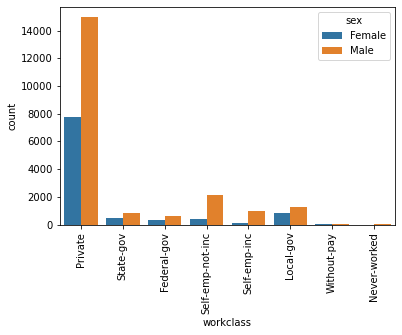

In [9]:
sns.countplot(data=adult,x='workclass',hue='sex')
plt.xticks(rotation=90)

In [10]:
adult['workclass']=adult['workclass'].fillna('Private')

# Handling OCCUPATION Column

In [11]:
adult['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [12]:
adult['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

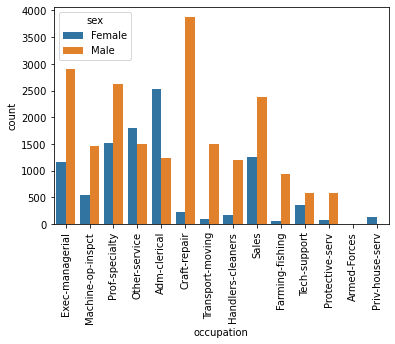

In [13]:
sns.countplot(data=adult,x='occupation',hue='sex')
plt.xticks(rotation=90)

In [14]:
def rep(cols):
    occ=cols[0]
    s=cols[1]
    if pd.isnull(occ):
        if s == 'Male':
            return 'Craft-repair'
        if s == 'Female':
            return 'Adm-clerical'
    return occ        

In [15]:
adult['occupation']=adult[['occupation','sex']].apply(rep,axis=1)

# Handling NATIVE COUNTRY Column

In [16]:
adult['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [17]:
adult['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

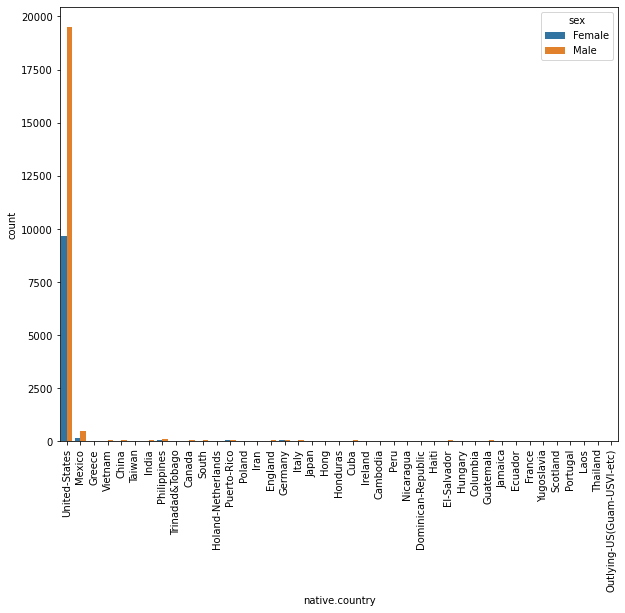

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=adult,x='native.country',hue='sex')
plt.xticks(rotation=90)

In [19]:
adult['native.country']=adult['native.country'].fillna('United-States')

In [20]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [21]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Adm-clerical,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
# Creating Dummy Column of Income
adult_new=pd.get_dummies(adult,columns=['income'],drop_first=True)
adult_new.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_>50K
0,90,Private,77053,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Adm-clerical,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

# Creating Categorical Dataset

In [24]:
# Creating Categorical Dataset
categorical=adult_new[['workclass','occupation','sex','native.country','income_>50K']]
for i in categorical.columns[:-1]:
    t=categorical.groupby(i).mean()
    enc=pd.Series(data=lb.fit_transform(t['income_>50K']),index=t.index)
    categorical[i + '-' + 'encone']=categorical[i].map(enc)

<ipython-input-24-27c26283c83c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i + '-' + 'encone']=categorical[i].map(enc)


In [25]:
categorical['education']= adult_new['education.num']

<ipython-input-25-3f886b8738dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['education']= adult_new['education.num']


In [26]:
categorical.head()

,workclass,occupation,sex,native.country,income_>50K,workclass-encone,occupation-encone,sex-encone,native.country-encone,education
0,Private,Adm-clerical,Female,United-States,0,1,5,0,20,9
1,Private,Exec-managerial,Female,United-States,0,1,13,0,20,9
2,Private,Adm-clerical,Female,United-States,0,1,5,0,20,10
3,Private,Machine-op-inspct,Female,United-States,0,1,6,0,20,4
4,Private,Prof-specialty,Female,United-States,0,1,12,0,20,10


# Creating Numerical Dataset

In [27]:
# Creating Numerical Dataset
numerical=adult_new[['fnlwgt','capital.gain','capital.loss','hours.per.week','income_>50K']]
for i in numerical.columns[:-1]:
    o=numerical.pivot_table(index=i,values='income_>50K')
    encoded=pd.Series(o['income_>50K'],index=o.index)
    numerical[i + '-' + 'encone'] =numerical[i].map(encoded)

<ipython-input-27-c6e637a78138>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[i + '-' + 'encone'] =numerical[i].map(encoded)


In [28]:
numerical.head()

,fnlwgt,capital.gain,capital.loss,hours.per.week,income_>50K,fnlwgt-encone,capital.gain-encone,capital.loss-encone,hours.per.week-encone
0,77053,0,4356,40,0,0.0,0.206506,0.0,0.213380
1,132870,0,4356,18,0,0.0,0.206506,0.0,0.093333
2,186061,0,4356,40,0,0.0,0.206506,0.0,0.213380
3,140359,0,3900,40,0,0.0,0.206506,0.0,0.213380
4,264663,0,3900,40,0,0.0,0.206506,0.0,0.213380


In [29]:
categorical =categorical.iloc[:,5:]
numerical=numerical.iloc[:,4:]

In [30]:
# Concating the two datset on fix column INCOME
combined=pd.concat([categorical,numerical],axis=1)
combined.head()

,workclass-encone,occupation-encone,sex-encone,native.country-encone,education,income_>50K,fnlwgt-encone,capital.gain-encone,capital.loss-encone,hours.per.week-encone
0,1,5,0,20,9,0,0.0,0.206506,0.0,0.213380
1,1,13,0,20,9,0,0.0,0.206506,0.0,0.093333
2,1,5,0,20,10,0,0.0,0.206506,0.0,0.213380
3,1,6,0,20,4,0,0.0,0.206506,0.0,0.213380
4,1,12,0,20,10,0,0.0,0.206506,0.0,0.213380


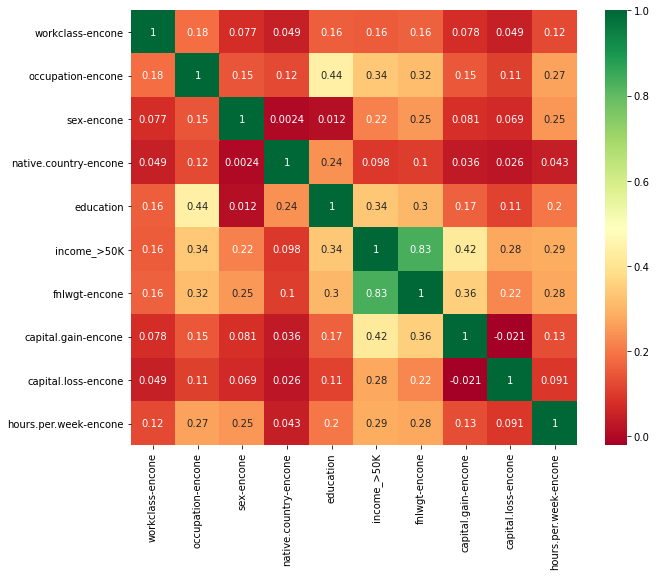

In [31]:
# Checking Features Dependancies
plt.figure(figsize=(10,8))
sns.heatmap(combined.corr(),cmap='RdYlGn',annot=True)

In [32]:
X=combined.drop('income_>50K',axis=1)
y=combined[['income_>50K']]

In [33]:
# Applying Feature Extraction
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

<ipython-input-33-e40d90eaf370>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[0.02035112 0.05730247 0.01650817 0.01055253 0.05318492 0.64289453
 0.10619578 0.04090788 0.0521026 ]


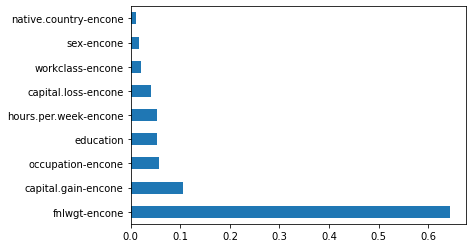

In [35]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_Xtrain=sc.fit_transform(X_train)
sc_Xtest=sc.fit_transform(X_test)

In [38]:
# Applying Gaussian Moodel
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(sc_Xtrain,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [39]:
prediction=classifier.predict(sc_Xtest)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4976
           1       0.79      0.81      0.80      1537

    accuracy                           0.90      6513
   macro avg       0.86      0.87      0.87      6513
weighted avg       0.90      0.90      0.90      6513

[[4643  333]
 [ 294 1243]]
